<a href="https://colab.research.google.com/github/fredericoaraujopt/BubblePop/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `ES 157` Lab 3

### Due Thursday, Nov. 2nd


## Objectives

* To become more familiar with the `ES 53` kit
* To learn to implement and use PCA
* To look at signals through eigen decomposition
* To use PCA as a filtering tool


## Pre-Lab Questions

These are some questions to get you thinking about the lab.

(a) In what ways is PCA similar to a Fourier Analysis of a signal?

In [38]:
# Principal Component Analysis (PCA) and Fourier analysis are both techniques used in data analysis and signal processing. PCA and Fourier Analysis share a commonality in that they both serve to uncover hidden patterns within data. PCA focuses on identifying the primary data components of significance, whereas Fourier Analysis dissects a signal into its constituent frequency elements. Both methods can be employed for the purposes of data compression and feature extraction.

(b) What are a few situations in which PCA performs better as a filter than DFT filtering?

In [39]:
# PCA excels over DFT filtering when data needs to be condensed, particularly in scenarios like dimensionality reduction. Furthermore, PCA outperforms DFT filtering when dealing with non-strictly additive data.

## Theoretical Overview

By now you should have already become somewhat familiar with the `ES 53` kit. If not, this is another chance to become more familiar. 🤓

PCA is an incredibly powerful tool. Through this lab, you'll get to see PCA used in many different applications.

## Python Libraries

It's always nice to make sure that your libraries work right at the top of your notebook.

In [40]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (newest at 6.1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (newest at 1.13.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (newest at 0.19.1)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (newest at 0.20.3)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (newest at 2.0.2)" % matplotlib.__version__)

IPython version:      7.34.0 (newest at 6.1.0)
Numpy version:        1.23.5 (newest at 1.13.1)
SciPy version:        1.11.3 (newest at 0.19.1)
Pandas version:        1.5.3 (newest at 0.20.3)
Mapltolib version:     3.7.1 (newest at 2.0.2)


- If any of these libraries are missing, you will need to [install them](https://github.com/cs109/content/wiki/Installing-Python#installing-additional-libraries) and restart IPython.
- If some packages are out-of-date, you may want to run (not a must) `pip install yourpackage --upgrade` and restart IPython.

**Peakutils is highly recommended for finding peaks. [Description](https://pypi.python.org/pypi/PeakUtils) and [usage](http://pythonhosted.org/PeakUtils/tutorial_a.html).**

In [41]:
pip install PeakUtils

In [42]:
import matplotlib.pyplot as plt
import peakutils
from peakutils.plot import plot as pplot

## Data Collection Procedure

*Note: If your data collection from Lab 2 was "clean", you can reuse the data and skip to the main task.*

Go to the [`ES 53` kit instructions](https://drive.google.com/file/d/1kTdwOe08Y6_Myb3LtalAX9UeQCKwfPiu/view?usp=sharing) and follow the instructions therein. We will collect ECG data from the chest by following the corresponding instructions. Once you have practiced collecting data, collect
data for the following scenarios:

### Resting ECG

Collect data for about 2 minutes while at rest. Make
sure to rest 15 seconds prior to recording to make sure your
heart beat has returned to baseline.

### Verify

Now that you've completed your data acquisition, make sure
to take a look at the data! Load your data below and make sure they were properly stored.

## Processing the Data with Python

### Plot the Data

Plot the ECG data below.  The `ES 53` kit is recording data with a sampling rate of `F = 3.3 kHz`. You will utilize this number throughout the notebooks to make your plots have axes in _seconds_ and _Hertz_ and to focus on areas of interest.

#### Resting ECG data

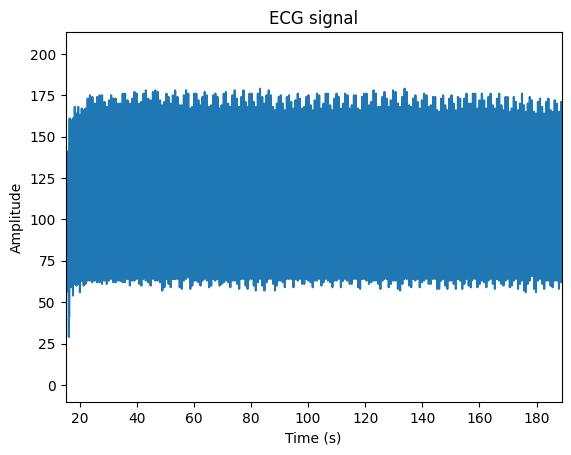

In [43]:
# Sampling rate is 3.3kHz
F_0 = 3.3 * 1e3

#load the data (replace text file with your data)
csv_path = 'Manos_ECG.txt'
csv = pd.read_csv(csv_path, usecols=[0], header=None)[0]

#load the data (replace text file with your data)
my_data = '10142023_161545.txt'
my_data = pd.read_csv(my_data, usecols=[0], header=None)[0]

# create a time axis
time = np.linspace(0, len(my_data) / F_0, len(my_data))

# plot the signal
plt.plot(time, my_data)
plt.xlim([time[50000], time[-1]])
plt.title("ECG signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Something even more interesting... PCA

#### Step 0: Mean Zero

Take your data and make sure that they have a mean of zero. Make sure you save the mean; we'll need it again later!

mean-subtracted ECG data mean: 5.9784820836826375e-15


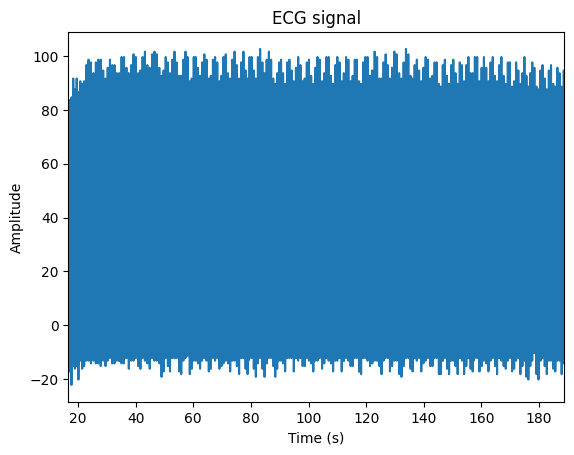

In [44]:
# removing initial noise from data
my_data_cropped = my_data[55000:-1]
time_cropped = time[55000:-1]
# Compute mean and remove it (zero the mean)
mean_ecg = np.mean(my_data_cropped)
ecg_data_zeroed_mean = my_data_cropped - mean_ecg
mean_ecg_data_zeroed_mean = np.mean(ecg_data_zeroed_mean)
print(f"mean-subtracted ECG data mean: {mean_ecg_data_zeroed_mean}")

# plot the signal
plt.plot(time_cropped, ecg_data_zeroed_mean)
plt.xlim([time_cropped[0], time_cropped[-1]])
plt.title("ECG signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

#### Step 1: Peakfinder

Using a peakfinder, plot the ECG data with red dots at the peaks of the QRS complex. Make sure that the peaks that are found are only ones that correspond to actual peaks, and remove any false peaks. This is **extremely important**. If you do not have a good peakfinder, you will not be able to segment your data properly and you will not be able to complete the rest of the lab.

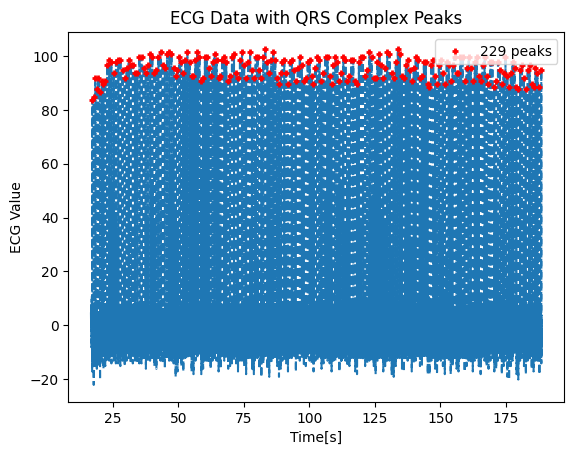

In [45]:
# Find the peak indices using peakutils
peak_indices = peakutils.indexes(ecg_data_zeroed_mean, thres=0.5, min_dist=1)
# print(peak_indices)

# Use pplot to create the plot with peaks
pplot(time_cropped, ecg_data_zeroed_mean, peak_indices)

# plt.xlim([time[50000], time[150000]])
plt.xlabel('Time[s]')
plt.ylabel('ECG Value')
plt.title('ECG Data with QRS Complex Peaks')
plt.show()


#### Step 2: Line 'em up
The first step to PCA is lining up your signals. In this case, they are the peaks of the QRS complex. Choose a `4001`-sample window and line up the peaks of the QRS complexes. You want the windows centered around the peak of the complex, therefore it should look like: **[2000 samples before the peak, the peak, 2000 samples after the peak]** (for a total length `4001`).

Plot all of your complexes (they should look like they are stacked on top of each other), and plot their mean in **RED** on top your other signals with a thickness of `4`.

Skipped peak at index 1557 because the window is out of bounds.
Skipped peak at index 567252 because the window is out of bounds.


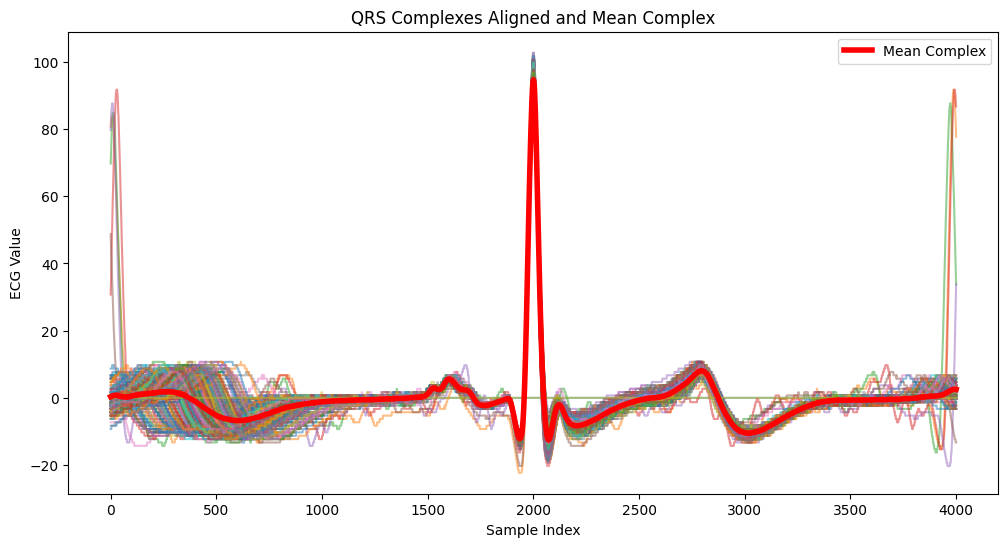

In [46]:
# Define the window size (4001 samples, 2000 before the peak, the peak, and 2000 after the peak)
window_size = 4001

# Initialize the aligned_complexes 2D array with zeros
aligned_complexes = np.zeros((len(peak_indices), window_size))

# Extract and stack the 4001-sample windows centered around the peak indices
for i, peak_index in enumerate(peak_indices):
    start_index = peak_index - window_size // 2
    end_index = start_index + window_size
    if start_index >= 0 and end_index <= len(my_data_cropped):
        complex_window = ecg_data_zeroed_mean[start_index:end_index]
        aligned_complexes[i, :] = complex_window
    else:
        # Explain skipped peaks
        print(f"Skipped peak at index {peak_index} because the window is out of bounds.")

# Calculate the mean of the complexes
mean_complex = np.mean(aligned_complexes, axis=0)

# Plot all the complexes stacked on top of each other
plt.figure(figsize=(12, 6))
for complex_window in aligned_complexes:
    plt.plot(complex_window, alpha=0.5)
plt.plot(mean_complex, color='r', linewidth=4, label='Mean Complex')
plt.xlabel('Sample Index')
plt.ylabel('ECG Value')
plt.title('QRS Complexes Aligned and Mean Complex')
plt.legend()
plt.show()




#### Step 3: Find the Covariance Matrix and Perform PCA

Choose the minimum number of eigenvectors needed to reconstruct your QRS complexes. Plot the mean of the complex and the mean of the reconstruction.

**Note**: When performing PCA, only use functions such as `np.linalg.eig` to calculate eigen-decomposition, do not use any built-in PCA functions or packages. When plotting the eigenvalues, restrict your `x` axis to `[0, 20]`.

1


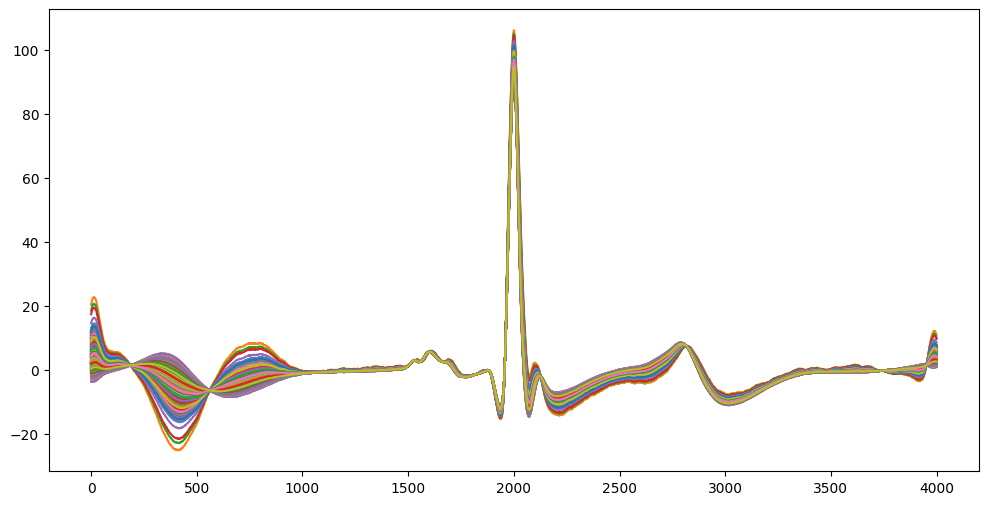

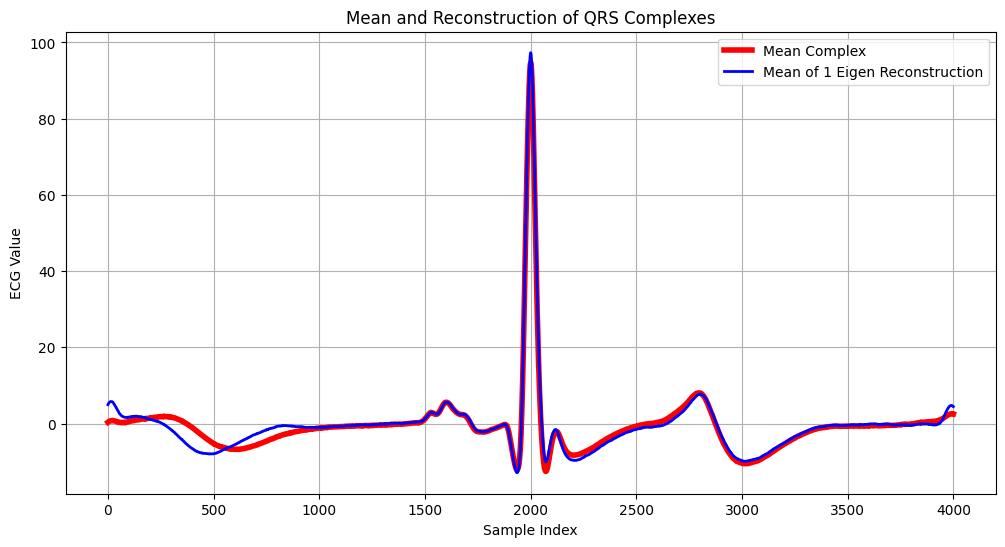

In [47]:
# Step 1: Compute the Covariance Matrix
covariance_matrix = np.cov(aligned_complexes, rowvar=False)

# Step 2: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 3: Sort Eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the number of eigenvectors to explain a certain percentage of the variance (e.g., 95%)
total_variance = np.sum(eigenvalues)
variance_explained = np.cumsum(eigenvectors) / total_variance
threshold = 0.95
num_eigenvectors = np.argmax(variance_explained >= threshold) + 1
print(num_eigenvectors)

# Ensure eigenvectors are real
eigenvectors = eigenvectors.real

# Step 5: Perform PCA
selected_eigenvectors = eigenvectors[:, :num_eigenvectors]

# Step 6: Reconstruct the Data
eigenvector_rep = np.dot(selected_eigenvectors.T, aligned_complexes.T)
reconstructed_complexes = ((selected_eigenvectors).dot(eigenvector_rep)).T

reconstruction = np.zeros((len(reconstructed_complexes), window_size))

for i in range(len(reconstructed_complexes)):
    reconstruction[i] = reconstructed_complexes[i] + mean_complex

mean_reconstruction = np.mean(reconstruction, axis=0)

# Step 7: Plot the Mean and Reconstruction
plt.figure(figsize=(12, 6))
for i in range(len(reconstruction)):
    plt.plot(reconstruction[i, :])

plt.figure(figsize=(12, 6))
plt.plot(mean_complex, color='r', linewidth=4, label='Mean Complex')
plt.plot(mean_reconstruction, color='b', linewidth=2, label=f'Mean of {num_eigenvectors} Eigen Reconstruction')
plt.xlabel('Sample Index')
plt.ylabel('ECG Value')
plt.title('Mean and Reconstruction of QRS Complexes')
plt.legend()
plt.grid(True)
plt.show()



#### Step 4: Compare your signature QRS complex to someone else in the class.

Trade your ECG data with someone from the class. Perform the steps above and compare their signature with yours. Plot your signature QRS complex and theirs on the same plot.

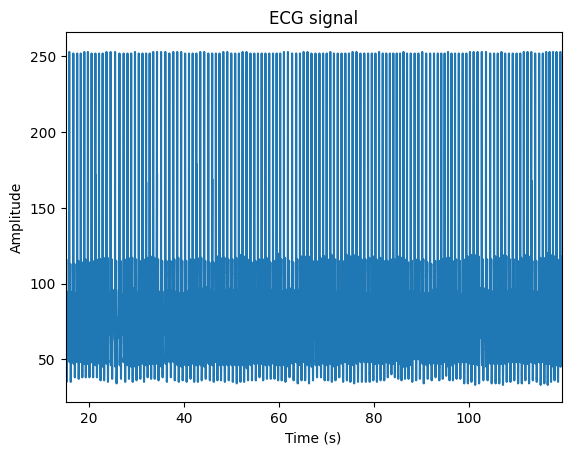

In [48]:
# Using Ellie's data
# Sampling rate is 3.3kHz
F_0 = 3.3 * 1e3

#load the data
my_data = 'ECG.txt'
my_data = pd.read_csv(my_data, usecols=[0], header=None)[0]

# create a time axis
time = np.linspace(0, len(my_data) / F_0, len(my_data))

# plot the signal
plt.plot(time, my_data)
plt.xlim([time[50000], time[-1]])
plt.title("ECG signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

mean-subtracted ECG data mean: 5.308231651985794e-15


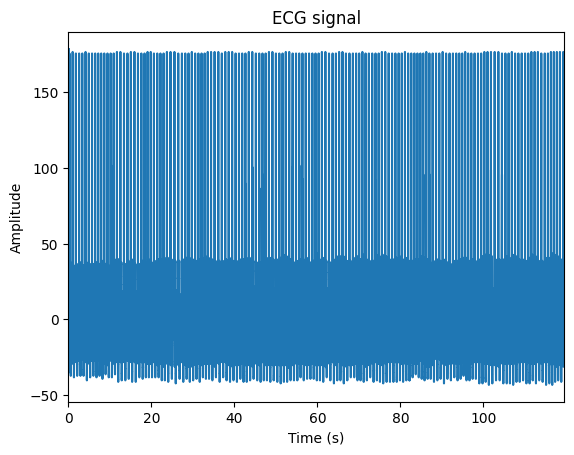

In [49]:
# Compute mean and remove it (zero the mean)
mean_ecg = np.mean(my_data)
ecg_data_zeroed_mean = my_data - mean_ecg
mean_ecg_data_zeroed_mean = np.mean(ecg_data_zeroed_mean)
print(f"mean-subtracted ECG data mean: {mean_ecg_data_zeroed_mean}")

# plot the signal
plt.plot(time, ecg_data_zeroed_mean)
plt.xlim([time[0], time[-1]])
plt.title("ECG signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

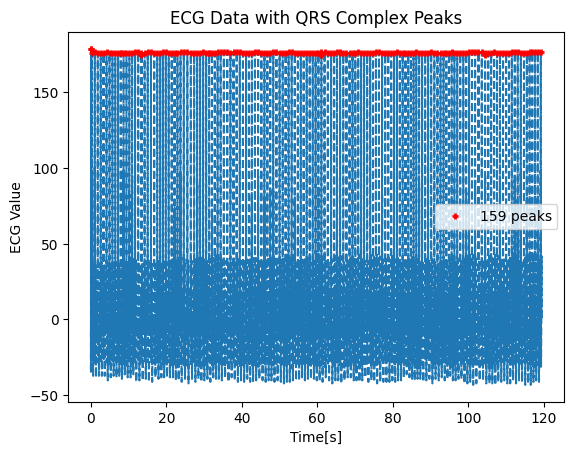

In [50]:
# Find the peak indices using peakutils
peak_indices = peakutils.indexes(ecg_data_zeroed_mean, thres=0.5, min_dist=1)
# print(peak_indices)

# Use pplot to create the plot with peaks
pplot(time, ecg_data_zeroed_mean, peak_indices)

# plt.xlim([time[50000], time[150000]])
plt.xlabel('Time[s]')
plt.ylabel('ECG Value')
plt.title('ECG Data with QRS Complex Peaks')
plt.show()

Skipped peak at index 88 because the window is out of bounds.
Skipped peak at index 216 because the window is out of bounds.
Skipped peak at index 855 because the window is out of bounds.
Skipped peak at index 393514 because the window is out of bounds.


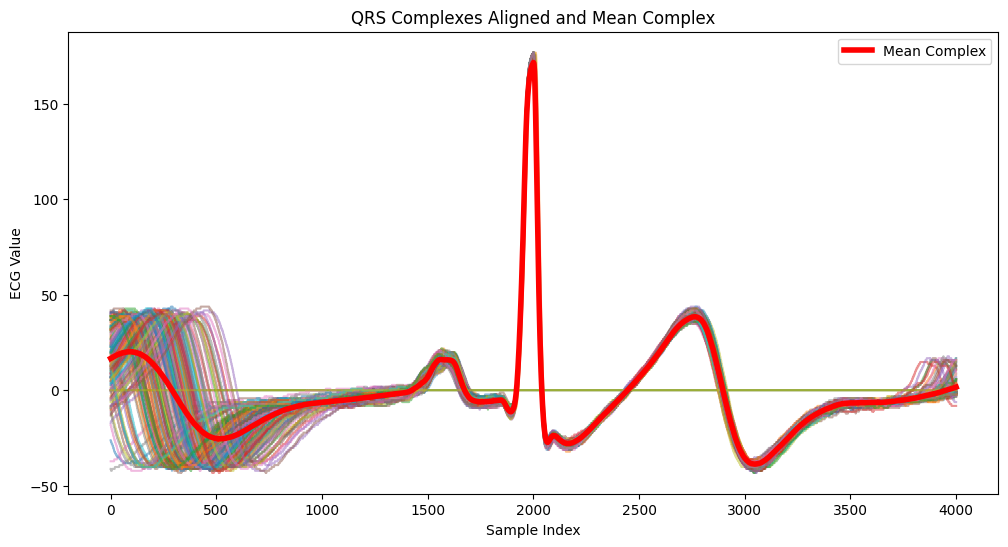

In [51]:
# Define the window size (4001 samples, 2000 before the peak, the peak, and 2000 after the peak)
window_size = 4001

# Initialize the aligned_complexes 2D array with zeros
aligned_complexes = np.zeros((len(peak_indices), window_size))

# Extract and stack the 4001-sample windows centered around the peak indices
for i, peak_index in enumerate(peak_indices):
    start_index = peak_index - window_size // 2
    end_index = start_index + window_size
    if start_index >= 0 and end_index <= len(my_data):
        complex_window = ecg_data_zeroed_mean[start_index:end_index]
        aligned_complexes[i, :] = complex_window
    else:
        # Explain skipped peaks
        print(f"Skipped peak at index {peak_index} because the window is out of bounds.")

# Calculate the mean of the complexes
mean_complex = np.mean(aligned_complexes, axis=0)

# Plot all the complexes stacked on top of each other
plt.figure(figsize=(12, 6))
for complex_window in aligned_complexes:
    plt.plot(complex_window, alpha=0.5)
plt.plot(mean_complex, color='r', linewidth=4, label='Mean Complex')
plt.xlabel('Sample Index')
plt.ylabel('ECG Value')
plt.title('QRS Complexes Aligned and Mean Complex')
plt.legend()
plt.show()

1


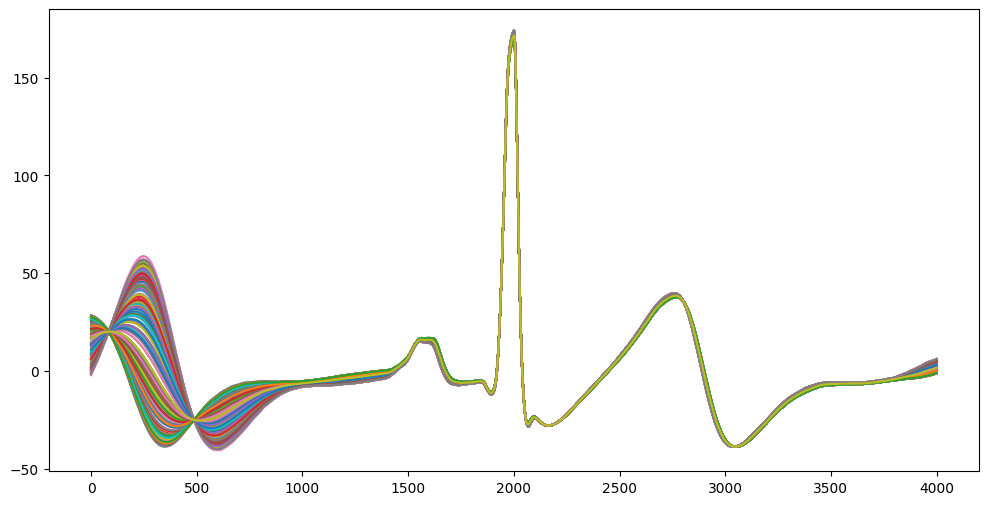

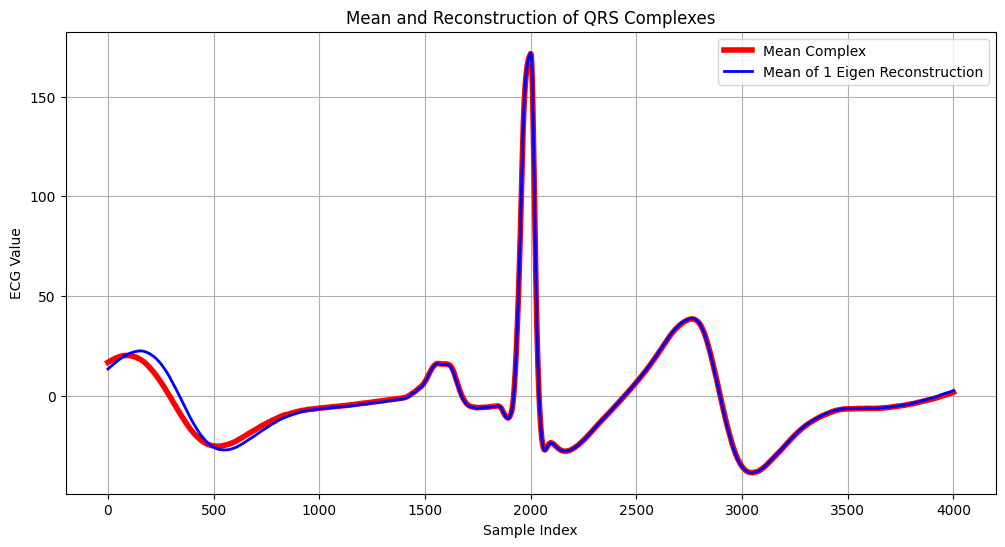

In [52]:
# Step 1: Compute the Covariance Matrix
covariance_matrix = np.cov(aligned_complexes, rowvar=False)

# Step 2: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 3: Sort Eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the number of eigenvectors to explain a certain percentage of the variance (e.g., 95%)
total_variance = np.sum(eigenvalues)
variance_explained = np.cumsum(eigenvectors) / total_variance
threshold = 0.95
num_eigenvectors = np.argmax(variance_explained >= threshold) + 1
print(num_eigenvectors)

# Ensure eigenvectors are real
eigenvectors = eigenvectors.real

# Step 5: Perform PCA
selected_eigenvectors = eigenvectors[:, :num_eigenvectors]

# Step 6: Reconstruct the Data
eigenvector_rep = np.dot(selected_eigenvectors.T, aligned_complexes.T)
reconstructed_complexes = ((selected_eigenvectors).dot(eigenvector_rep)).T

reconstruction = np.zeros((len(reconstructed_complexes), window_size))

for i in range(len(reconstructed_complexes)):
    reconstruction[i] = reconstructed_complexes[i] + mean_complex

mean_reconstruction_ellie = np.mean(reconstruction, axis=0)

# Step 7: Plot the Mean and Reconstruction
plt.figure(figsize=(12, 6))
for i in range(len(reconstruction)):
    plt.plot(reconstruction[i, :])

plt.figure(figsize=(12, 6))
plt.plot(mean_complex, color='r', linewidth=4, label='Mean Complex')
plt.plot(mean_reconstruction_ellie, color='b', linewidth=2, label=f'Mean of {num_eigenvectors} Eigen Reconstruction')
plt.xlabel('Sample Index')
plt.ylabel('ECG Value')
plt.title('Mean and Reconstruction of QRS Complexes')
plt.legend()
plt.grid(True)
plt.show()

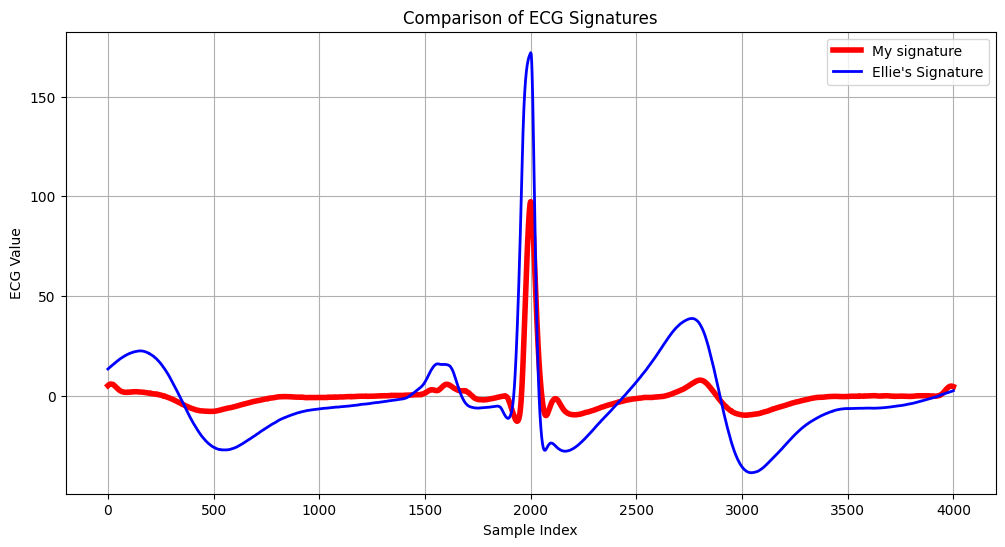

In [53]:
# Compare Signatures
plt.figure(figsize=(12, 6))
plt.plot(mean_reconstruction, color='r', linewidth=4, label='My signature')
plt.plot(mean_reconstruction_ellie, color='b', linewidth=2, label='Ellie\'s Signature')
plt.xlabel('Sample Index')
plt.ylabel('ECG Value')
plt.title('Comparison of ECG Signatures')
plt.legend()
plt.grid(True)
plt.show()

---

## Final Project

The goal of this section is to get you to start thinking about your project. We ask that you think about an idea for your project and write a short proposal (up to one page) answering the following questions:
1. What is the goal of the project/idea?
2. What data will you need to collect?
3. What current/future tools from class do you plan to use?

Your project can either be COVID related, or utilize the `ES 53` kit in some form. The class's [syllabus](https://drive.google.com/file/d/1HG9w-Ct4i0AGhf27fcEKne1Pk41oP_vC/view?usp=sharing) contains more information and ideas about COVID related projects. We also provide you access to [this](https://drive.google.com/drive/folders/1qc8vhpq7viotsiSvn9mxhQyvY1SRI2Ea?usp=sharing) folder, which contains project proposals from last year's iteration of the class.

**Winston** took this class last year; feel free to reach out to him to discuss project ideas and get his perspective.

**Note**: This will serve as your project proposal that would have been done on 10/29 in our calendar on the syllabus. Please include a `pdf` of your project proposal in this repo upon submission.